In [1]:
 
import cv2
import matplotlib.pyplot as plt
import time 
%matplotlib inline


In [2]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [3]:
 test1 = cv2.imread('test1.jpeg')

gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)


In [4]:
test1

array([[[248, 242, 243],
        [248, 242, 243],
        [249, 243, 244],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[248, 242, 243],
        [248, 242, 243],
        [249, 243, 244],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[248, 242, 243],
        [248, 242, 243],
        [249, 243, 244],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       ...,

       [[253, 247, 248],
        [253, 247, 248],
        [253, 247, 248],
        ...,
        [251, 237, 255],
        [255, 248, 255],
        [255, 248, 255]],

       [[253, 247, 248],
        [253, 247, 248],
        [253, 247, 248],
        ...,
        [255, 246, 255],
        [255, 249, 255],
        [255, 244, 254]],

       [[253, 247, 248],
        [253, 247, 248],
        [253, 247, 248],
        ...,
        [248, 242, 243],
        [246, 240, 241],
        [250, 244, 245]]

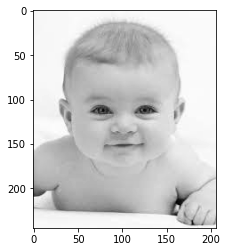

In [5]:
plt.imshow(gray_img, cmap='gray')


In [6]:
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')


In [7]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);

#print the number of faces found
print('Faces found: ', len(faces))


Faces found:  1


In [8]:
#go over list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)


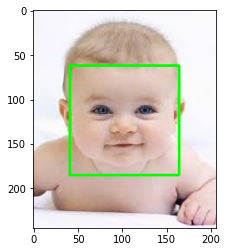

In [9]:
plt.imshow(convertToRGB(test1))


In [10]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy


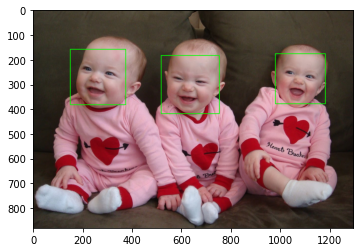

In [11]:
#load another image
test2 = cv2.imread('test3.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))


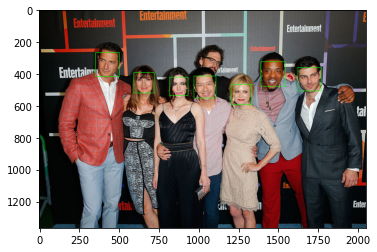

In [12]:
#load another image
test2 = cv2.imread('test4.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))


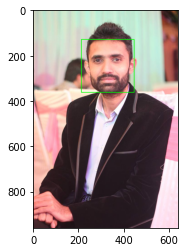

In [14]:
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

#load test image
test2 = cv2.imread('test2.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))


In [15]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

#load test image1
test1 = cv2.imread('test5.jpg')
#load test image2
test2 = cv2.imread('test6.jpg')


In [16]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene


In [17]:
#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene


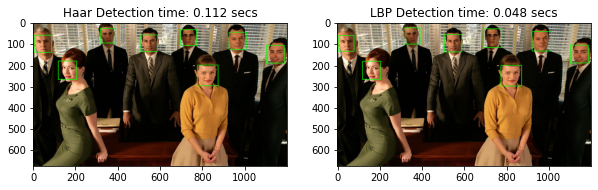

In [18]:
#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)


In [19]:
test2

array([[[212, 240, 241],
        [213, 241, 242],
        [219, 245, 245],
        ...,
        [  1,   6,   9],
        [  1,   6,   7],
        [  1,   6,   7]],

       [[218, 245, 249],
        [219, 247, 248],
        [223, 248, 250],
        ...,
        [  1,   6,   9],
        [  0,   4,   5],
        [  0,   4,   5]],

       [[211, 240, 245],
        [215, 244, 249],
        [221, 247, 253],
        ...,
        [  1,   6,   9],
        [  0,   4,   5],
        [  0,   4,   5]],

       ...,

       [[  7,  47, 105],
        [  0,  35,  93],
        [  2,  42, 100],
        ...,
        [  5,  29,  75],
        [  0,  26,  72],
        [  0,  26,  72]],

       [[  6,  46, 104],
        [  0,  40,  98],
        [  7,  47, 105],
        ...,
        [  6,  30,  76],
        [  1,  27,  73],
        [  1,  27,  73]],

       [[ 12,  52, 110],
        [ 11,  51, 109],
        [ 16,  56, 114],
        ...,
        [  9,  33,  79],
        [  5,  31,  77],
        [  5,  31,  77]]

In [22]:
 
    gray_img

array([[243, 243, 244, ..., 251, 251, 251],
       [243, 243, 244, ..., 251, 251, 251],
       [243, 243, 244, ..., 251, 251, 251],
       ...,
       [248, 248, 248, ..., 244, 251, 251],
       [248, 248, 248, ..., 250, 251, 248],
       [248, 248, 248, ..., 243, 241, 245]], dtype=uint8)

In [ ]:
t